In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,auc
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data='https://raw.githubusercontent.com/soletian11/strokedetect/main/healthcare-dataset-stroke-data.csv'

In [4]:
df=pd.read_csv(data)

In [5]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [6]:
len(df)

5110

In [7]:
#Removing Id which is having unique column values and doesn't impact outcome.So removing from dataset
# df=df.drop('id',axis=1)

## Standardization 
    1.Having all lower case and underscores for col name having ''
    2.Having data in all lower case and underscores having ''

In [8]:
#Cleaning metadata like column names having every column lower case 
df.columns=df.columns.str.lower()

In [9]:
# for col in df.columns:
#     print()
#     print("Column Name : ",col)
#     print(df[col].value_counts())
#     print()

In [10]:
#Categorcial Columns and Numerical Cols
categorical=list(df.dtypes[df.dtypes==object].index)
numerical=[ 'id','age',  'hypertension',  'heart_disease',  'avg_glucose_level',  'bmi']


In [11]:
## Cleaning up data and makes values lower case in of categorical
for col in categorical:
    df[col]=df[col].str.lower().str.replace(' ','_')
    

In [12]:
numerical, categorical

(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'],
 ['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status'])

In [13]:
# ##Adding rules on numerical col's
# ##Age :rounding  because it has decimals values like 0.8 and added new col age_modified
# df['age_modified']=df['age'].round()
# df[df['age']<10]
# ####

# ##bmi :setting 0 for NAN
# df['bmi']=df['bmi'].fillna(0)
df['bmi']=df['bmi'].fillna(28.89)

# df[df.bmi.isna()]

# df.describe()


In [14]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [15]:
df.gender.value_counts()

female    2994
male      2115
other        1
Name: gender, dtype: int64

In [16]:
df_full_train, df_test=train_test_split(df,test_size=0.2,random_state=42)

In [17]:
df_test['stroke'].value_counts()

0    960
1     62
Name: stroke, dtype: int64

In [18]:
df_train, df_val=train_test_split(df_full_train,test_size=0.25,random_state=42)

In [19]:
df_full_train=df_full_train.reset_index(drop=True)
df_train=df_train.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)

y_train=df_train['stroke'].values
y_full_train=df_full_train['stroke'].values
y_test=df_test['stroke'].values
y_val=df_val['stroke'].values

del df_train['stroke']
del df_test['stroke']
del df_val['stroke']




# del df_full_train['stroke']

## Feature Importance -Categorical

## Feature Importance using stroke rate

In [20]:
 from IPython.display import display
global_stroke_rate=df_full_train.stroke.mean()
global_stroke_rate
df_full_train['gender'].value_counts()

female    2401
male      1687
Name: gender, dtype: int64

In [21]:
for c in ['gender','ever_married', 'work_type', 'residence_type', 'smoking_status']:
    print()
    df_cat_group=df_full_train.groupby(c).stroke.agg(['mean','count'])
    df_cat_group['global_stroke_rate']=global_stroke_rate
    df_cat_group['diff']=df_cat_group['mean']-global_stroke_rate
    df_cat_group['risk']=df_cat_group['mean']/global_stroke_rate
    display(df_cat_group)

,mean,count,global_stroke_rate,diff,risk
gender,,,,,
female,0.044565,2401,0.045744,-0.001179,0.974229
male,0.047421,1687,0.045744,0.001678,1.036679


,mean,count,global_stroke_rate,diff,risk
ever_married,,,,,
no,0.017718,1411,0.045744,-0.028026,0.387331
yes,0.060516,2677,0.045744,0.014772,1.322927


,mean,count,global_stroke_rate,diff,risk
work_type,,,,,
children,0.003711,539,0.045744,-0.042033,0.081117
govt_job,0.046468,538,0.045744,0.000725,1.015844
never_worked,0.000000,20,0.045744,-0.045744,0.000000
private,0.047986,2334,0.045744,0.002243,1.049026
self-employed,0.073059,657,0.045744,0.027316,1.597148


,mean,count,global_stroke_rate,diff,risk
residence_type,,,,,
rural,0.042564,1997,0.045744,-0.003180,0.930487
urban,0.048780,2091,0.045744,0.003037,1.066388


,mean,count,global_stroke_rate,diff,risk
smoking_status,,,,,
formerly_smoked,0.070225,712,0.045744,0.024481,1.535180
never_smoked,0.045123,1507,0.045744,-0.000621,0.986427
smokes,0.051887,636,0.045744,0.006143,1.134295
unknown,0.029197,1233,0.045744,-0.016547,0.638276


## Feature Importance using mutual info for categorical Varaibles

In [22]:
from sklearn.metrics import mutual_info_score

In [23]:
feature_scores=[]
for c in categorical:
     feature_scores.append((c,mutual_info_score(df_full_train[c],df_full_train['stroke'])))
columns=['categorical_var','mutual_score']
df_col_mutual_scores=pd.DataFrame(feature_scores, columns=columns)
df_col_mutual_scores.sort_values('mutual_score', ascending=False)
    

,categorical_var,mutual_score
2,work_type,0.005867
1,ever_married,0.005505
4,smoking_status,0.002180
3,residence_type,0.000111
0,gender,0.000023


## Feature Importance - Numerical

In [24]:
df_full_train[numerical].corrwith(df_full_train.stroke)

id                   0.010855
age                  0.237170
hypertension         0.118129
heart_disease        0.131467
avg_glucose_level    0.122887
bmi                  0.038813
dtype: float64

## One Hot Encoding

In [25]:
train_dicts=df_train[categorical+numerical].to_dict(orient='records')
test_dicts=df_test[categorical+numerical].to_dict(orient='records')
val_dicts=df_val[categorical+numerical].to_dict(orient='records')
dv=DictVectorizer(sparse=False)
X_train=dv.fit_transform(train_dicts)
X_val=dv.transform(val_dicts)
X_test=dv.transform(test_dicts)


In [26]:
dv.get_feature_names()

['age',
 'avg_glucose_level',
 'bmi',
 'ever_married=no',
 'ever_married=yes',
 'gender=female',
 'gender=male',
 'heart_disease',
 'hypertension',
 'id',
 'residence_type=rural',
 'residence_type=urban',
 'smoking_status=formerly_smoked',
 'smoking_status=never_smoked',
 'smoking_status=smokes',
 'smoking_status=unknown',
 'work_type=children',
 'work_type=govt_job',
 'work_type=never_worked',
 'work_type=private',
 'work_type=self-employed']

In [27]:
model=LogisticRegression(max_iter=1000,class_weight='balanced')#--,solver='liblinear'
model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [28]:
y_pred_val=model.predict_proba(X_val)[:,1]# Soft Predictions- Score

y_pred_val

array([0.12707363, 0.87704469, 0.93897209, ..., 0.6745551 , 0.25206834,
       0.87987478])

In [29]:
stroke_decision=y_pred_val>0.5

In [30]:
scores=[]
thresholds=np.linspace(0,1,21)
for i in thresholds:
    stroke_threshold=y_pred_val>i
    score=(stroke_threshold==y_val).mean()
    print('%.2f,%.3f' %(i,score))
    scores.append((score))


0.00,0.043
0.05,0.168
0.10,0.304
0.15,0.390
0.20,0.441
0.25,0.482
0.30,0.542
0.35,0.597
0.40,0.639
0.45,0.678
0.50,0.714
0.55,0.752
0.60,0.776
0.65,0.814
0.70,0.837
0.75,0.866
0.80,0.892
0.85,0.914
0.90,0.943
0.95,0.959
1.00,0.957


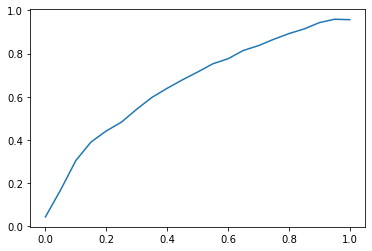

In [31]:
plt.plot(thresholds,scores)

## Accuracy

In [32]:
(stroke_decision==y_val).sum(), len(stroke_decision)

(730, 1022)

In [33]:
df_pred = pd.DataFrame({'probability':y_pred_val, 'prediction':stroke_decision.astype(int),'actual':y_val})

df_pred['correct']=(df_pred['prediction']==df_pred['actual'])

In [34]:
df_pred

,probability,prediction,actual,correct
0,0.127074,0,0,True
1,0.877045,1,1,True
2,0.938972,1,0,False
3,0.049740,0,0,True
4,0.907706,1,0,False
...,...,...,...,...
1017,0.252040,0,0,True
1018,0.529729,1,0,False
1019,0.674555,1,0,False
1020,0.252068,0,0,True


In [35]:
df_pred['correct'].mean()

0.7142857142857143

In [36]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val,stroke_decision))

0.7142857142857143


In [37]:
(y_val==stroke_decision).mean()

0.7142857142857143

In [38]:
# df.loc[df['column_name'] == value]

In [39]:
df.loc[df['id'] == 4712]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
103,4712,female,81.0,0,1,yes,self-employed,rural,78.7,19.4,unknown,1


In [40]:
dict(zip(dv.get_feature_names(),model.coef_[0]))

{'age': 0.05855425822304231,
 'avg_glucose_level': 0.004184566721872566,
 'bmi': -0.04973694299597381,
 'ever_married=no': -0.5565973623947604,
 'ever_married=yes': -0.2504126438562355,
 'gender=female': -0.5436797266628517,
 'gender=male': -0.263330279584046,
 'heart_disease': 0.3360846978343081,
 'hypertension': 0.610902012468069,
 'id': -2.35242360055464e-07,
 'residence_type=rural': -0.2114858196662791,
 'residence_type=urban': -0.5955241865852201,
 'smoking_status=formerly_smoked': 0.11510159414684276,
 'smoking_status=never_smoked': -0.45812469240295983,
 'smoking_status=smokes': 0.12171819959601768,
 'smoking_status=unknown': -0.5857051075895663,
 'work_type=children': -0.27707502986985494,
 'work_type=govt_job': -0.16863698913822847,
 'work_type=never_worked': -0.017189215212660952,
 'work_type=private': -0.26488076477174993,
 'work_type=self-employed': -0.07922800725514653}

In [41]:
model.coef_[0]
model.intercept_

array([-0.80705156])

In [42]:
dv.get_feature_names()

['age',
 'avg_glucose_level',
 'bmi',
 'ever_married=no',
 'ever_married=yes',
 'gender=female',
 'gender=male',
 'heart_disease',
 'hypertension',
 'id',
 'residence_type=rural',
 'residence_type=urban',
 'smoking_status=formerly_smoked',
 'smoking_status=never_smoked',
 'smoking_status=smokes',
 'smoking_status=unknown',
 'work_type=children',
 'work_type=govt_job',
 'work_type=never_worked',
 'work_type=private',
 'work_type=self-employed']

###    

In [43]:

t=0.5
actual_positive=(y_val==1)
actual_negative=(y_val==0)

predict_positive=(y_pred_val>=0.5)
predict_negative=(y_pred_val<0.5)

predict_positive[:5]

array([False,  True,  True, False,  True])

In [44]:
actual_positive

array([False,  True, False, ..., False, False, False])

In [45]:
Counter(actual_positive), Counter(predict_positive), Counter(actual_negative), Counter(predict_negative)

NameError: name 'Counter' is not defined

In [ ]:
predict_positive.sum()

In [ ]:

tp=(predict_positive &actual_positive).sum()
tp

In [ ]:
tp=(predict_positive &actual_positive).sum()
tn=(predict_negative &actual_negative  ).sum()
fp=(predict_positive &actual_negative ).sum()
fn=(predict_negative &actual_positive  ).sum()

In [ ]:
confusion_matrix=np.array([
    [tn, fp],
     [fn,tp]
    
])
confusion_matrix

In [ ]:

(tp+tn)/(tp+tn+fp+fn)


In [ ]:
p=(tp)/(tp+fp)
p


In [ ]:
tp+fn

In [ ]:
r=tp/(tp+fn)
r

In [ ]:
(confusion_matrix/confusion_matrix.sum()).round(3)

In [ ]:
fpr=fp/(fp+tn)# All negatives
fpr

In [ ]:
tpr=tp/(tp+fn)
tpr

## ROC

In [ ]:
scores=[]
for t in np.linspace(0,1,101,):  
    actual_positive=(y_val==1)
    actual_negative=(y_val==0)
    predict_positive=(y_pred_val>=t)
    predict_negative=(y_pred_val<t)
    tp=(predict_positive &actual_positive).sum()
    tn=(predict_negative &actual_negative  ).sum()
    fp=(predict_positive &actual_negative ).sum()
    fn=(predict_negative &actual_positive  ).sum()
    tpr=tp/(tp+fn)
    fpr=fp/(fp+tn)
    scores.append((t,tp,tn,fp,fn,tpr,fpr))

columns=['threshold','tp','tn','fp','fn','tpr','fpr']
df_roc_curve=pd.DataFrame(scores, columns=columns)
df_roc_curve
    
    
    
    

In [ ]:
plt.plot(df_roc_curve['threshold'],df_roc_curve['tpr'], label='TPR')
plt.plot(df_roc_curve['threshold'],df_roc_curve['fpr'],label='FPR')
plt.xlabel("threshold")
plt.ylabel("FPR/TPR")


In [ ]:
y_val.mean()

In [ ]:
from sklearn.metrics import roc_curve


In [ ]:
fpr,tpr,threshold=roc_curve(y_val,y_pred)



In [46]:
auc(fpr,tpr)

NameError: name 'fpr' is not defined

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])

##  On Full Train and Test Data Set

In [ ]:
del df_full_train['stroke']

In [ ]:
full_train_dicts=df_full_train[categorical+numerical].to_dict(orient='records')
test_dicts=df_test[categorical+numerical].to_dict(orient='records')
X_full_train=dv.fit_transform(full_train_dicts)



In [ ]:
# 0.01, 0.1, 0.5, 10
model=LogisticRegression(solver='liblinear', C=10, max_iter=1000)
model.fit(X_train,y_train)
model.fit(X_full_train, y_full_train)

In [ ]:

y_pred_test=model.predict_proba(X_test)[:,1]# Soft Predictions- Score
stroke_decision1=y_pred_test>0.5
stroke_decision1=stroke_decision1.astype(int)

In [47]:
print(accuracy_score(y_test,stroke_decision1))

auc=roc_auc_score(y_test, stroke_decision1)
#   print('%s, %.2f' % (n, auc))
print('%.3f' % (auc))

NameError: name 'stroke_decision1' is not defined

In [ ]:
df_pred = pd.DataFrame({'probability':y_pred_test, 'prediction':stroke_decision1.astype(int),'actual':y_test})

df_pred['correct']=(df_pred['prediction']==df_pred['actual'])

In [ ]:
df_pred[(df_pred.actual==1) & (df_pred.prediction==0)]

In [ ]:
import pickle
C=10

In [ ]:
def train(df_train,y_train,C):
    train_dicts=df_train[numerical+categorical].to_dict(orient='records')
    dv=DictVectorizer(sparse=False)
    X_train=dv.fit_transform(train_dicts)
    model=LogisticRegression(max_iter=1000,C=C)
    model.fit(X_train,y_train)
    
    return model,dv

def predict(df,dv,model):
    dicts=df[numerical+categorical].to_dict(orient='records')
    X=dv.transform(dicts)
    y_pred=model.predict_proba(X)[:,1]
    
    return y_pred
    

In [ ]:
train_dicts

In [ ]:
model,dv=train(df_train,y_train, C=C)
y_pred=predict(df_val,dv,model)
y_pred

In [ ]:
ouput_file=f'model_C={C}.bin'
ouput_file

In [ ]:
with open(ouput_file,'wb') as f_out:
    pickle.dump((dv,model),f_out)
    

In [ ]:
input_file='model_C=10.bin'

with open (input_file,'rb') as f_in:
    dv,model=pickle.load(f_in)


In [ ]:
model,dv

In [ ]:
matrix = confusion_matrix(y_test, y_pred_test)

In [ ]:
model.predict_proba(X)[:,1]